This notebook looks at gradient descent/ascent from the point of view of dynamic systems theory. Gradient descent is the basic learning procedure for neural networks. We start by defining an objective, usually formulated as a Loss function where we'd like to mimimize the loss. We moreover define a neural network, and identify its trainable parameters. Backpropagation of error tells us to compute the gradient of every parameter with respect to loss.

In this example we look at a very simple case, where there are just two trainable parameters $x$ and $y$. The loss function is given my an equation that involves three terms: the first multiplying $x$ and $y$, the second squaring $x$, and the third squaring $y$:

$$
f(x,y) = axy + x^2 - y^2
$$

In [158]:
def f(x,y,a=1):
    return ((a*x*y) + (x*x) - (y*y))

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [159]:
# Set limits and number of points in grid
y, x = np.mgrid[10:-10:100j, 10:-10:100j]


In [161]:
a_parameter = 10
p = f(x,y,a_parameter)

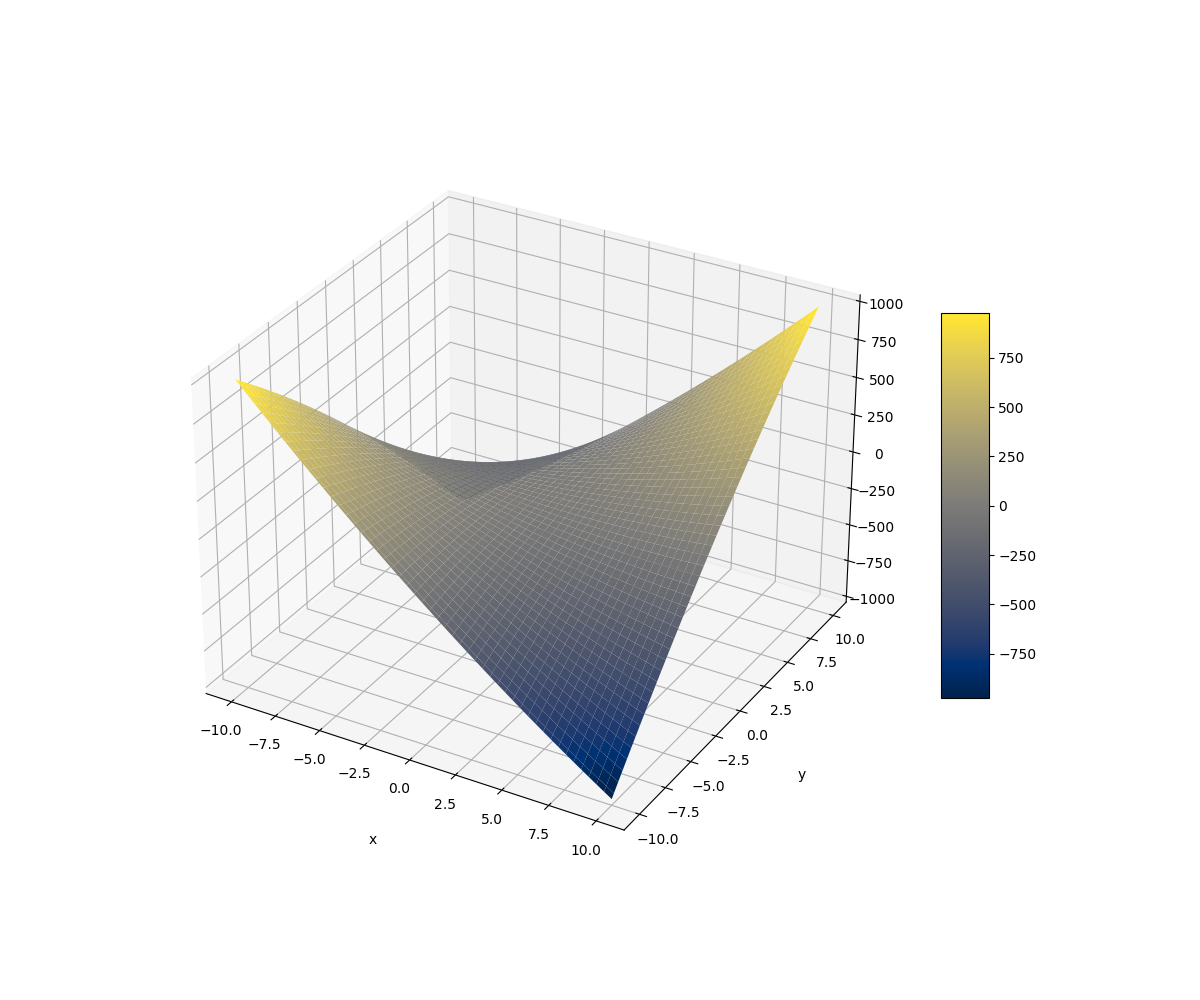

In [156]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

surf = ax.plot_surface(x, y, p, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

In [162]:
# For the absolute values of "dx" and "dy" to mean anything, we'll need to
# specify the "cellsize" of our grid.  For purely visual purposes, though,
# we could get away with just "dy, dx = np.gradient(p)".
dy, dx = np.gradient(p) # np.diff(y[:2, 0]), np.diff(x[0, :2]))

#dy = dy*-1.0 # minmax game: ascent gradient in the x direction, descend in the x direction
#dx = dx*-1.0
# plot every 10 points in every direction
skip = (slice(None, None, 10), slice(None, None, 10))

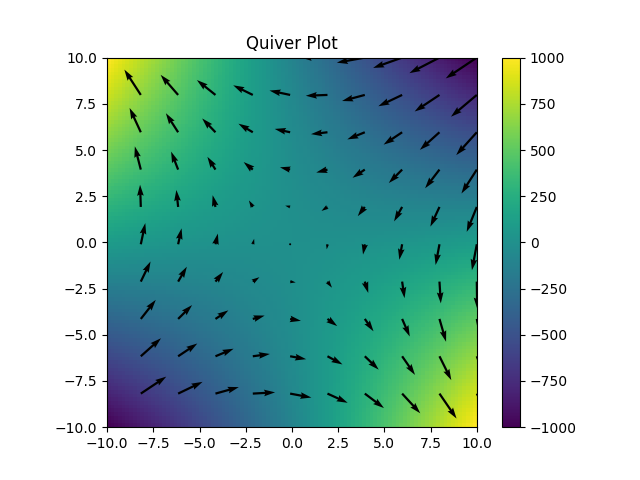

In [163]:
fig, ax = plt.subplots()
im = ax.imshow(p, extent=[x.min(), x.max(), y.min(), y.max()])
ax.quiver(x[skip], y[skip], dx[skip], dy[skip])

fig.colorbar(im)
ax.set(aspect=1, title='Quiver Plot')
plt.show()

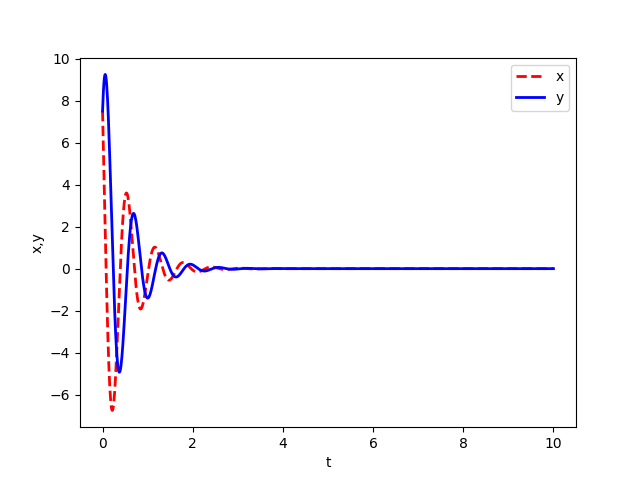

In [153]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def g(s,t):
    a = 10
    thex = s[0]
    they = s[1]
    dxdt = -1 * ( 2*thex + a* they)
    dydt = 1 * ( -2*they + a*thex)
    return [dxdt, dydt]

#    a = 4
#    b = 7
#    n = s[0]
#    c = s[1]
#    dndt = a * n - (c/(c+1)) * b * n
#    dcdt = (c/(c+1)) * n - c + 1
#    return [dndt, dcdt]

t = np.linspace(0,10,1000)
s0=[7.5,7.5]

s = odeint(g,s0,t)

plt.plot(t,s[:,0],'r--', linewidth=2.0)
plt.plot(t,s[:,1],'b-', linewidth=2.0)
plt.xlabel("t")
plt.ylabel("x,y")
plt.legend(["x","y"])
plt.show()

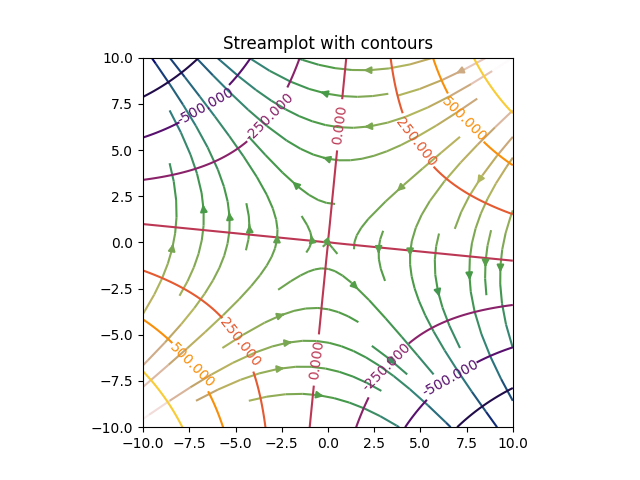

In [164]:
fig, ax = plt.subplots()

ax.streamplot(x, y, dx, dy, color=p, density=0.5, cmap='gist_earth')

cont = ax.contour(x, y, p, cmap='inferno')
ax.clabel(cont)

ax.set(aspect=1, title='Streamplot with contours')
plt.show()

Now do everything again for the much more interesting where we are trying to maximize $x$ and to minimize $y$: we play the mini-max game.

Inspired by this tweet: \url{https://twitter.com/gabrielpeyre/status/1504699120379826179}

In [140]:
# For the absolute values of "dx" and "dy" to mean anything, we'll need to
# specify the "cellsize" of our grid.  For purely visual purposes, though,
# we could get away with just "dy, dx = np.gradient(p)".
dy, dx = np.gradient(p) # np.diff(y[:2, 0]), np.diff(x[0, :2]))

dy = dy*-1.0 # minmax game: ascent gradient in the x direction, descend in the x direction
#dx = dx*-1.0
# plot every 10 points in every direction
skip = (slice(None, None, 10), slice(None, None, 10))